## Trying the same keras.imdb dataset but this time with **RNNs**

In [1]:
from keras.models import Sequential
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

## Preparing the data

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Train out model

In [3]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - acc: 0.5501 - loss: 0.6798 - val_acc: 0.7926 - val_loss: 0.4751
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - acc: 0.8088 - loss: 0.4344 - val_acc: 0.8424 - val_loss: 0.3754
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.8642 - loss: 0.3344 - val_acc: 0.8476 - val_loss: 0.3608
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.8751 - loss: 0.3133 - val_acc: 0.8386 - val_loss: 0.3744
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.8898 - loss: 0.2758 - val_acc: 0.8786 - val_loss: 0.2983
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.9046 - loss: 0.2483 - val_acc: 0.8310 - val_loss: 0.4223
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9069 - loss: 0.2450 - val_acc: 0.8846 - val_loss: 0.2879
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.9189 - loss: 0.2164 - val_acc: 0.8800 - val_loss: 0.3026
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms

## plotting the outcome

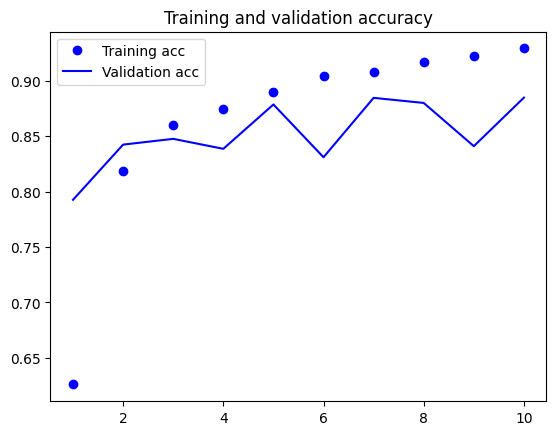

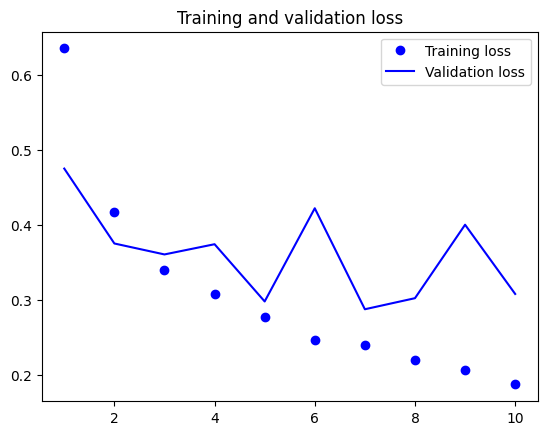

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()